# Asset Allocation Coding Challenge - Fall 2024

In [1020]:
"""

Your Name: Eli Reinhold

"""

'\n\nYour Name: Eli Reinhold\n\n'

The Asset Allocation team is dedicated to accurately predicting the behavior of the market sectors, and to providing optimal weights for these sectors in order to optimize holdings and exposures. Our goal, consistent with the rest of Quant, is to outperform the S&P 500 with higher returns and lower volatility. Asset Allocation is pillared on thorough research, creative modeling, and mathematical analysis.

**Rules:**


*   You are allowed to use ChatGPT, but you MUST cite it with a comment on each line written by it.
*   Any code not written by you must be cited similarly.
*   No machine learning is allowed for this challenge.

**Hints:**


*   Read all of the instructions carefully!
*   Comment your code with as much detail as you can. The easier it is for us to follow, the better!
*   Above everything else, we are looking to see that you can think creatively, and justify your thought process.
*   Don't give up if you get stuck! It's better to submit something that's the best that you can do, instead of quitting and not submitting anything.



# Part 0: Data

In the following cell, import any libraries you need.

In [1021]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In the following cell, write your code to load and preprocess the data given to you for Part 1 of the challenge. All data collection for Part 1 should be done here.

In [1022]:
class ReadFile:
    #Stack Overflow
    #Constructor to read csv file
    def __init__(self, file_path):
        self.file_path = file_path
    
    #Stack Overflow
    #Make it able to read both csv and excel files because we are dealing with both
    def read_file(self):
        return pd.read_excel(self.file_path)
    
sheet1 = ReadFile("C:\\Users\\elire\\Downloads\\F24 SSMIF Quant Coding Challenge\\Challenges\\Asset Allocation Challenge\\CAPM_Challenge_Data.xlsx")
data1 = sheet1.read_file()

#This changes the data into daily returns to help calcuate beta for CAPM
def daily_return(data):
    for column in data.columns[1:]: 
        #Chat GPT
        data[column] = data[column].pct_change() * 100
    return data

stocks_daily_return = daily_return(data1)

In the following cell, write your code to load and preprocess the data given to you for Part 2 of the challenge. If you decide to pull any other data for this model, do that here too. All data collection for Part 2 should be done here.

In [1023]:
data2 = pd.read_excel("C:\\Users\\elire\\Downloads\\F24 SSMIF Quant Coding Challenge\\Challenges\\Asset Allocation Challenge\\AssetAllocationChallengePart2Data.xlsx", sheet_name=None)
#Geeksforgeeks
def get_sheet_data(sheet):
    data = data2[sheet]
    return data

In the following cell, write any comments about your code and reasoning, such as why you processed the data in a certain way, what you noticed, where you found any additional data (if you decide to do so), etc.

In [1024]:
"""
For part 1 I read the data and changed the data into daily returns to help calcuate beta for CAPM.

For part 2 I made a fucntion to get the data of each sheet individually. I did this because I only
need to access one sheet at a time. There were no inconsistancies in the data (like no null values 
or char other than int) so no need to clean the data.
"""

'\nFor part 1 I read the data and changed the data into daily returns to help calcuate beta for CAPM.\n\nFor part 2 I made a fucntion to get the data of each sheet individually. I did this because I only\nneed to access one sheet at a time. There were no inconsistancies in the data (like no null values \nor char other than int) so no need to clean the data.\n'

# Part 1: Capital Asset Pricing Model (CAPM)

The Capital Asset Pricing Model (CAPM) is a popular model that describes the relationship between the expected return and the risk of investing in a security.

In the following cell, implement the Capital Asset Pricing Model on the data given to you for Part 1.

Your final result should be the expected annualized returns for the assets given in the data.

In [1025]:
#CAPM Formula: ri = rf + Bi(rm-rf)
#S&P 500 annual return is 10.26% = rm
#10-year treasury rate is 4.08% = rf

def CAPM(stocks_df):
    rf = 4.08
    rm = 10.26
    for column in stocks_df.columns[1:]:
        #Chat GPT
        #Gets all rows of the second column of the data
        market_returns = stocks_daily_return.iloc[:, 1]
        
        #Stack Overflow, chatGPT
        #Calculates coveriance
        covariance = stocks_df[column].cov(market_returns)
        #Stack Overflow
        #Calculates variance
        market_variance = market_returns.var()
        #Calculates Beta
        Bi = covariance / market_variance
        
        #Calculates the expected return using CAPM formula
        expected_return = rf + Bi * (rm - rf)

        #ChatGPT for fromating
        print(column+ ': ' + f'{expected_return:.2f}%')

#Implements CAPM and returns expected annualized returns for the assests given compared to S&P 500
CAPM(stocks_daily_return)

stock1: 10.26%
stock2: 7.18%
stock3: 6.08%
stock4: 5.95%
stock5: 7.20%
stock6: 6.91%
stock7: 4.87%
stock8: 4.84%
stock9: 4.88%
stock10: 5.74%
stock11: 5.95%
stock12: 8.44%
stock13: 5.23%
stock14: 5.10%
stock15: 5.09%


In the following cell, write any comments about your code and reasoning, such as why you implemented the CAPM in a specific way, what you noticed, what the significance of this is, etc.

In [1026]:
"""
I researched what a CAPM is and came across the equation: ri = rf + Bi(rm-rf).
I decide to use the annual return of the S&P500 for Rm because it is the expected return of the market.
The S&P500 is a good baseline to use because it tracks the performance of the 500 largest companies.
I used the 10-year treasury rate for rf because bonds are risk free. The signifance of the CAPM is
that since beta is less than 1, it tells investors that the security has less systematic risk and volatility
than the market. This means the the stock is less sensitive to the markets movements and is considered a
stable investment.
"""

'\nI researched what a CAPM is and came across the equation: ri = rf + Bi(rm-rf).\nI decide to use the annual return of the S&P500 for Rm because it is the expected return of the market.\nThe S&P500 is a good baseline to use because it tracks the performance of the 500 largest companies.\nI used the 10-year treasury rate for rf because bonds are risk free. The signifance of the CAPM is\nthat since beta is less than 1, it tells investors that the security has less systematic risk and volatility\nthan the market. This means the the stock is less sensitive to the markets movements and is considered a\nstable investment.\n'

# Part 2: Three-Factor Model

The objective of this is to create a three-factor model based on the provided data for Part 2.

The CAPM is essentially a one-factor model, where the factor is the market risk. We want you to implement a three-factor model of your choosing.

Be creative!

Your model does not necessarily need to perform well. We are mainly looking to see your creativity and whether you can express your thought process.

You are free to pull any additional data, or you can stick with the financial data given to you for this part.

In the following cell, implement your three-factor model.

Your final result should be the optimal weights for the 15 assets in this mock portfolio.

In [1027]:
#Calcuates P/E = share_price / eps
def pe_ratio(sheet, current_share_price):
    #Gets data from sheet
    sheet_data = get_sheet_data(sheet)
    #Gets eps from column
    recent_eps = sheet_data['epsDil'].iloc[0]
    #calcuates share_price/eps
    return current_share_price/recent_eps

#Calcuates EV/BITDA
def evebitda_ratio(sheet, current_share_price):
    #Gets data from sheet
    sheet_data = get_sheet_data(sheet)
    #Calcuates market cap = share price * share weighted average
    market_cap = current_share_price * sheet_data['shareswa'].iloc[0]
    #Calcuates total debt = current debt + non current debt
    total_debt = sheet_data['debtCurrent'].iloc[0] + sheet_data['debtNonCurrent'].iloc[0]
    #ev = market_cap + total_debt - liquid assests
    ev =  market_cap +  total_debt - sheet_data['cashAndEq'].iloc[0]

    #ebitda = ebit + Depreciation and Amortization
    ebitda = sheet_data['ebit'].iloc[0] + sheet_data['depamor'].iloc[0]
    
    #Calcuates ratio
    return ev/ebitda

def ps_ratio(sheet, current_share_price):
    #Gets data from sheet
    sheet_data = get_sheet_data(sheet)
    #Calcuates market cap = share price * share weighted average
    market_cap = current_share_price * sheet_data['shareswa'].iloc[0]
    #Gets revenue of stock
    rev = sheet_data['revenue'].iloc[0]
    #Calcuates ratio
    return market_cap/rev

def model(data):
    #Gets current share prices of each stock in order of sheets
    current_share_price = [236.37, 496.98, 188.76, 185.36, 10.96, 54.16, 416.88, 739.39, 142.26, 51.82, 359.37, 240.25, 147.37, 55.96, 287.65]
    counter = 0
    for sheet in data:
        #Calcuates ratios for each stock
        pe = pe_ratio(sheet, current_share_price[counter])
        ev = evebitda_ratio(sheet, current_share_price[counter])
        ps = ps_ratio(sheet, current_share_price[counter])
        #Adds ratios up to get an overall picture of performance
        total = .30*pe + .40*ev + .30*ps
        #Finds weights by dividing by number of stocks
        weight = total/15
        #Prints out weights
        print(sheet+ ': ' + f'{weight:.2f}%')
        counter = counter + 1
model(data2)



AAPL: 5.09%
ADBE: 13.03%
AMZN: 5.87%
BIIB: 4.43%
F: 7.16%
MNST: 6.81%
MSFT: 6.32%
NFLX: 9.37%
NVDA: 1.54%
OXY: 1.58%
POOL: 10.79%
RMD: 6.97%
ROST: 3.32%
TAP: 3.55%
V: 5.83%


In the following cell, write any comments about your code and reasoning, such as what your factors were, how you decided on them, what your thought process was, what worked and didn't work, etc. Justify your model as best as you can.

In [1028]:
"""

Factor 1: P/E
I decided to use P/E because it helps understand a company's value compared to its earnings.
This can see if a stock is overvalued or undervalued and its future growth potential.

Factor 2: EV/EBITDA
I decided to use EV/EBITDA because it allows investors to compare the value of companies
without interest and taxes, providing a more pure evaluation.

Factor 3: P/S
I used this because it determines with the stock is valued properly.

I weighted each value as such because EV/EBITDA values more of the stability of the stock
while the other 2 value more of the stocks growth. From what I found, it seems like it is better
to invest in stable rather than growth. I used these 3 metrics specifically because they are
3 of the most common that are used by professionals.

A short coming of this model is that it from my research it seems like a higher P/E and lower EV/EBITDA
and P/S is ideal. My model currently acts like a higher number is good for all ratios when in reality it
most likely is not.
"""

"\n\nFactor 1: P/E\nI decided to use P/E because it helps understand a company's value compared to its earnings.\nThis can see if a stock is overvalued or undervalued and its future growth potential.\n\nFactor 2: EV/EBITDA\nI decided to use EV/EBITDA because it allows investors to compare the value of companies\nwithout interest and taxes, providing a more pure evaluation.\n\nFactor 3: P/S\nI used this because it determines with the stock is valued properly.\n\nI weighted each value as such because EV/EBITDA values more of the stability of the stock\nwhile the other 2 value more of the stocks growth. From what I found, it seems like it is better\nto invest in stable rather than growth. I used these 3 metrics specifically because they are\n3 of the most common that are used by professionals.\n\nA short coming of this model is that it from my research it seems like a higher P/E and lower EV/EBITDA\nand P/S is ideal. My model currently acts like a higher number is good for all ratios when

# Part 3: Backtesting

A very important part of the model-building process is backtesting. Backtesting is where you compare your model's performance against a benchmark to see how well it performs. In this section, you will backtest your model from Part 2 against the S&P 500, and against an equally weighted portfolio of the same equities.

In the following cell, backtest your model from Part 2 against the S&P 500. In addition to plotting the returns, provide the Sharpe Ratio, Cumulative Returns, and Volatility against the S&P 500.

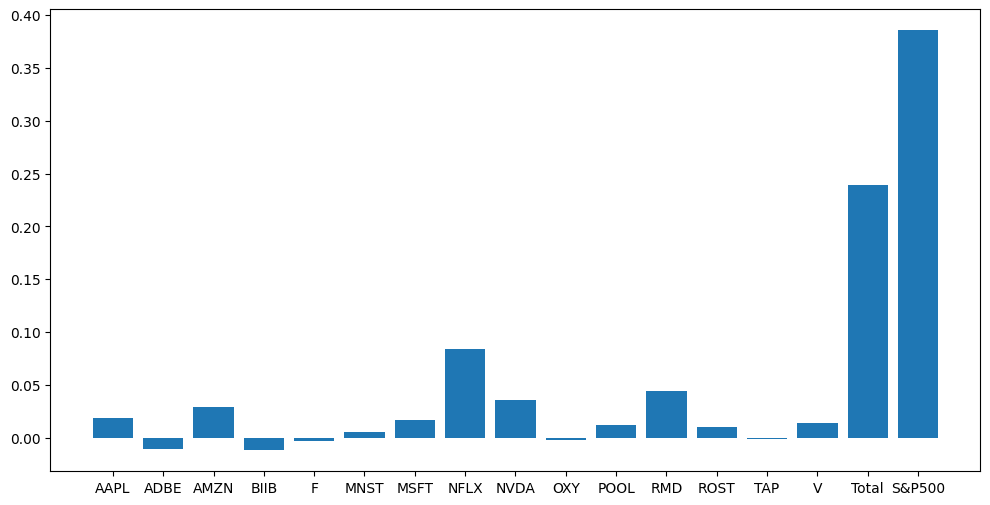

Sharpe Ratio of portfolio: 1.89
Sharpe Ratio of S&P500: 2.85
Cummaltive Retrun of portfolio: 23.92%
Cummaltive Retrun of S&P500: 38.82%
Volatility of portfolio: 10.44%
Volatility of S&P500: 11.06%


In [1029]:
#Chat GPT
#Returns dictionary of annual returns of the model, the stocks, and S&P500
def annual_return_of_model():
    #Dictionary of returns for each stock
    returns = {
        'AAPL': 0.0509 * 0.3654,
        'ADBE': 0.1303 * -0.0818,
        'AMZN': 0.0587 * .4939,
        'BIIB': 0.0443 * -0.2727,
        'F': 0.0716 * -0.0457,
        'MNST': 0.0681 * 0.0742,
        'MSFT': 0.0632 * 0.2666,
        'NFLX': 0.0937 * 0.8973,
        'NVDA': 0.0154 * 2.3046,
        'OXY': 0.0158 * -0.1753,
        'POOL': 0.1079 * 0.1131,
        'RMD': 0.0697 * 0.6327,
        'ROST': 0.0332 * 0.287,
        'TAP': 0.0355 * -0.0288,
        'V': 0.0583 * 0.2425,
    }
    #Adds returns for total return of portfolio
    total_return = sum(returns.values())
    #Adds total return to the dictionary
    returns['Total'] = total_return 
    #Adds return of S&P500 to dictionary
    returns['S&P500'] = .3857
    return returns


#Calls the function to get the returns
returns = annual_return_of_model()

#Chat GPT
#Separates the stocks and their returns for plotting
stocks = list(returns.keys())
values = list(returns.values())

#Chat GPT
#Plots the bar graph
plt.figure(figsize=(12, 6))
plt.bar(stocks, values)
plt.show()


total_return = 0.23922620000000003
#Sharpe Ratio = (Ri - Rf)/sigmap
def sharpe_ratio(returns, stocks):
    #I used treasury yeild for the risk free rate
    treasury_yield = .0419
    #Calculates excess return
    excess_return = returns - treasury_yield
    #Stack Overflow
    #Calculates the standard deviation of portfolio 
    std_excess_return = statistics.stdev(stocks)

    return excess_return/std_excess_return

#Calculates sharpe ratio of portfolio
ratio = sharpe_ratio(total_return, values)

#Finds volatility of portflio
def volatility(stocks):
    #Calculates standard deviation
    std_excess_return = statistics.stdev(stocks)
    return std_excess_return

#Calcualates volatility of portflio
vol = volatility(values)

#Prints sharpe ratio, volatility, and cummaltive returns
print('Sharpe Ratio of portfolio: ' + f'{ratio:.2f}')
#According to PortfoliosLab
print('Sharpe Ratio of S&P500: 2.85')

print('Cummaltive Retrun of portfolio: ' + f'{total_return*100:.2f}%')
#According to Google Market Summary
print('Cummaltive Retrun of S&P500: 38.82%')

print('Volatility of portfolio: ' + f'{vol*100:.2f}%')
#According to V-Lab
print('Volatility of S&P500: 11.06%')

In the following cell, backtest your model from Part 2 against an equally weighted portfolio of the same equities. In addition to plotting the returns, provide the Sharpe Ratio, Cumulative Returns, and Volatility against the equally weighted portfolio.

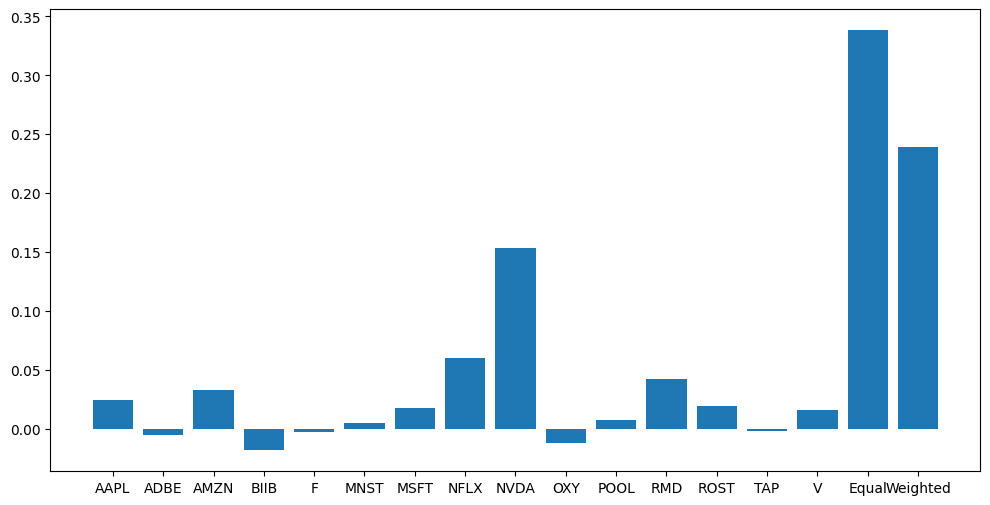

Sharpe Ratio of equal portfolio: 3.02
Sharpe Ratio of my portfolio: 1.89
Cummaltive Retrun of equal portfolio: 33.82%
Cummaltive Retrun of my portfolio: 23.92%
Volatility of equal portfolio: 9.83%
Volatility of my portfolio: 10.44%


In [1030]:
def annual_return_of_equal():
    #Dictionary of returns for each stock with equal weights
    returns = {
        'AAPL': (1/15) * 0.3654,
        'ADBE': (1/15)  * -0.0818,
        'AMZN': (1/15) * .4939,
        'BIIB':(1/15)  * -0.2727,
        'F': (1/15) * -0.0457,
        'MNST': (1/15) * 0.0742,
        'MSFT': (1/15) * 0.2666,
        'NFLX': (1/15) * 0.8973,
        'NVDA': (1/15) * 2.3046,
        'OXY': (1/15) * -0.1753,
        'POOL': (1/15) * 0.1131,
        'RMD': (1/15) * 0.6327,
        'ROST': (1/15) * 0.287,
        'TAP': (1/15) * -0.0288,
        'V': (1/15) * 0.2425,
    }
    #Adds returns for total return of equal weighted portfolio
    total_return = sum(returns.values())
    #Adds total return of equal weighted portfolio to the dictionary
    returns['Equal'] = total_return 
    #Adds return of my portfolio to dictionary
    returns['Weighted'] = 0.23922620000000003
    return returns

#Calls the function to get the returns
returns = annual_return_of_equal()

#Separates the stocks and their returns for plotting
stocks = list(returns.keys())
values = list(returns.values())

#Plots the bar graph
plt.figure(figsize=(12, 6))
plt.bar(stocks, values)
plt.show()

#Calcuates sharpe ratio and volatility of equal weight portfolio
total_return = 0.3382
ratio = sharpe_ratio(total_return, values)
vol = volatility(values)

#Prints sharpe ratio, volatility, and cummaltive returns
print('Sharpe Ratio of equal portfolio: ' + f'{ratio:.2f}')
print('Sharpe Ratio of my portfolio: 1.89')

print('Cummaltive Retrun of equal portfolio: ' + f'{total_return*100:.2f}%')
print('Cummaltive Retrun of my portfolio: 23.92%')

print('Volatility of equal portfolio: ' + f'{vol*100:.2f}%')
print('Volatility of my portfolio: 10.44%')



In the following cell, write any comments about your code and reasoning, such as what the takeaways are from the backtesting, what you noticed about the results, what they tell you, what you would do differently next time, etc.

In [1031]:
"""
From the backtesting I learned that my portfolio performs worse than the S&P500
and if I did not assign any unqiue weights at all. I notice that the volatility
of my portfolio is lower than the S&P500. This means my portfolio is more stable
than the S&P500 which was one of my goals with my portfolio. I also found it interesting
how the equally weighted portfolio has a higher sharpe ratio than the S&P500. This means
the risk of the S&P500 is not being offset by its return as much as equally weighted
profolio. I wonder how the S&P500 makes their portfolio and the factors they 
weigh the most.
"""

'\nFrom the backtesting I learned that my portfolio performs worse than the S&P500\nand if I did not assign any unqiue weights at all. I notice that the volatility\nof my portfolio is lower than the S&P500. This means my portfolio is more stable\nthan the S&P500 which was one of my goals with my portfolio. I also found it interesting\nhow the equally weighted portfolio has a higher sharpe ratio than the S&P500. This means\nthe risk of the S&P500 is not being offset by its return as much as equally weighted\nprofolio. I wonder how the S&P500 makes their portfolio and the factors they \nweigh the most.\n'

# References, Reflection, and Submission

In the following cell, list any references and resources you used to help you with this coding challenge (including ChatGPT), and what you got out of each resource. There's nothing wrong with getting help, but it's important to cite when you do!

In [1032]:
"""
Problem 1:
Stack Overflow: I used this for all parts to help with syntaxing

ChatGPT: I was not sure of the syntax to use so I asked ChatGPT to write code for ideas I was not sure
how to implement. I also used it for debugging.

Introduction to the Capital Asset Pricing Model (CAPM) with Python by Peter Foy: I used this to get
a grasp of the overall struture to use for the CAPM code.

I used Investopedia to find stats like annual return of S&P500 and treasury rate

Problem 2:
ChatGPT: I asked it to explain what each statisic was in each column of each sheet to help me better
understand what each stat meant. I also used it to find the equations for P/E, EV/EBITDA
and P/S.

Investopedia: I used it to help figure out what factors investors currently find the most important

Google: I used google to find the share prices of each stock currently.

GeeksforGeeks: I used this to help me read the second data set because it wsa and excel file 
with multiple sheets.

Problem 3:
ChatGPT: I used it to help me make a graph because I had little knowledge on how to do that

Google: I got the annual returns of each stock and S&P500 off of market summary

Investopedia: I used it to find the equations for volatility and sharpe ratio
"""

'\nProblem 1:\nStack Overflow: I used this for all parts to help with syntaxing\n\nChatGPT: I was not sure of the syntax to use so I asked ChatGPT to write code for ideas I was not sure\nhow to implement. I also used it for debugging.\n\nIntroduction to the Capital Asset Pricing Model (CAPM) with Python by Peter Foy: I used this to get\na grasp of the overall struture to use for the CAPM code.\n\nI used Investopedia to find stats like annual return of S&P500 and treasury rate\n\nProblem 2:\nChatGPT: I asked it to explain what each statisic was in each column of each sheet to help me better\nunderstand what each stat meant. I also used it to find the equations for P/E, EV/EBITDA\nand P/S.\n\nInvestopedia: I used it to help figure out what factors investors currently find the most important\n\nGoogle: I used google to find the share prices of each stock currently.\n\nGeeksforGeeks: I used this to help me read the second data set because it wsa and excel file \nwith multiple sheets.\n\n'

In the following cell, write a brief reflection on what you learned from this challenge. What did you do well? What do you wish you had done differently? Is there anything else you would like to add about your code or process that would help us understand?

In [1033]:
"""
From this challenge I learned how to make a model (CAPM and 3-Factor Model) which is something I never done before. By making the models I
learned and become familiar with various statisical equations that investors use everyday. I also realized the challenge of making profolios that
beat the S&P500 and beat equally weighted profolios in general. I think I did a good job of researching new finincal terms, the signifance of
them, and how to implement them. However, I think the way I implemented them may not have been ideal and resulted in a profolio that did not
perfrom to the standards I wanted to. If I were to do this challenge again I would try to find more obscure factors for the 3-factor model
that investors may not have thought of yet or create my own factor using the data provided. I decided to use factors popular today because I
thought the popularity meant it was good to use. Overall, I feel good about the effort I put into implementing and the way I did it, just the
solution I arrived to was not ideal.
"""

'\n\nComments here.\n\n'

Submit this template file in the format "firstname_lastname_aa.ipynb".

Example: "jason_bhalla_aa.ipynb"